# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Student Depression Dataset.csv')

print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-

In [3]:
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()


Number of Duplicate Rows: 0


In [4]:
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [5]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [6]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


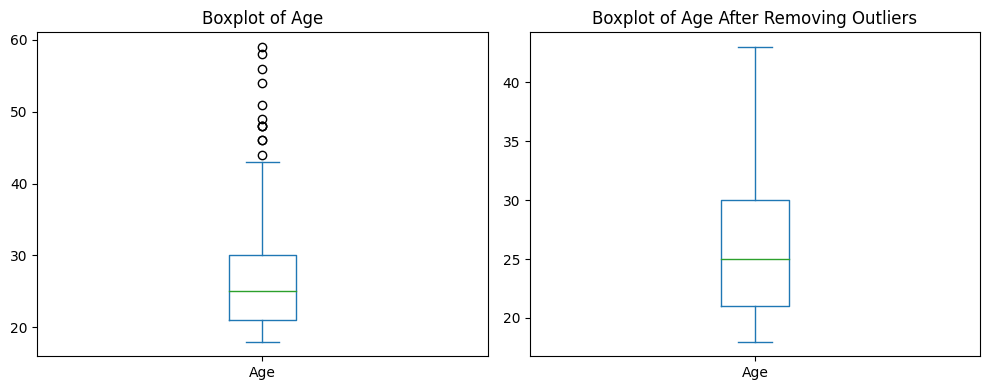

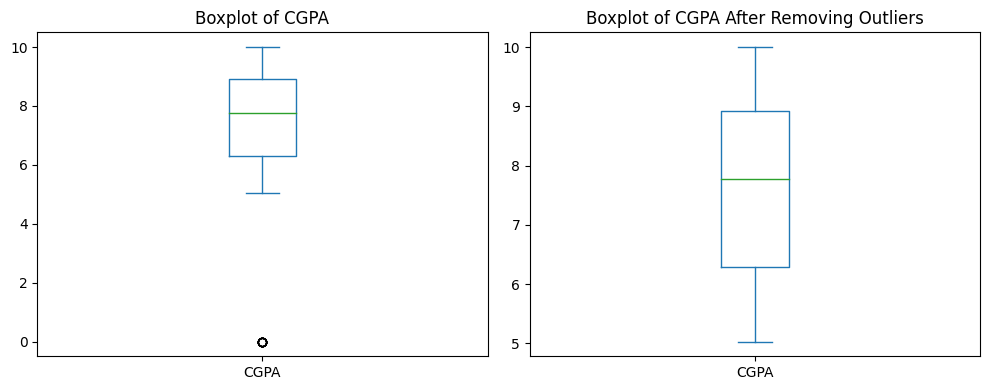

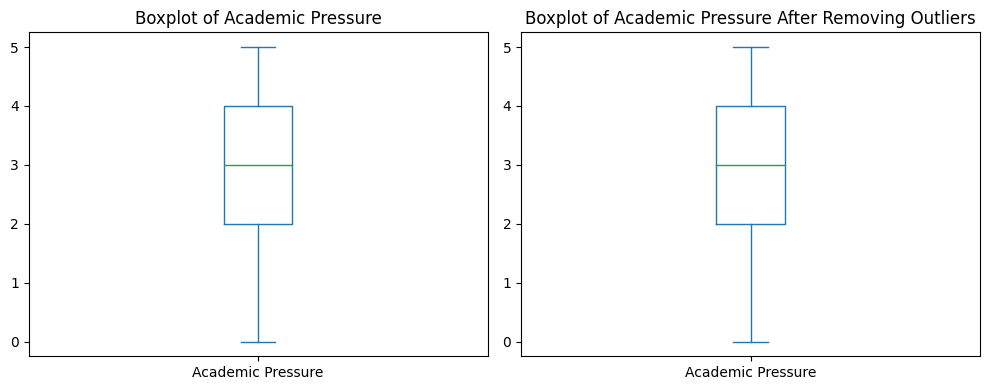

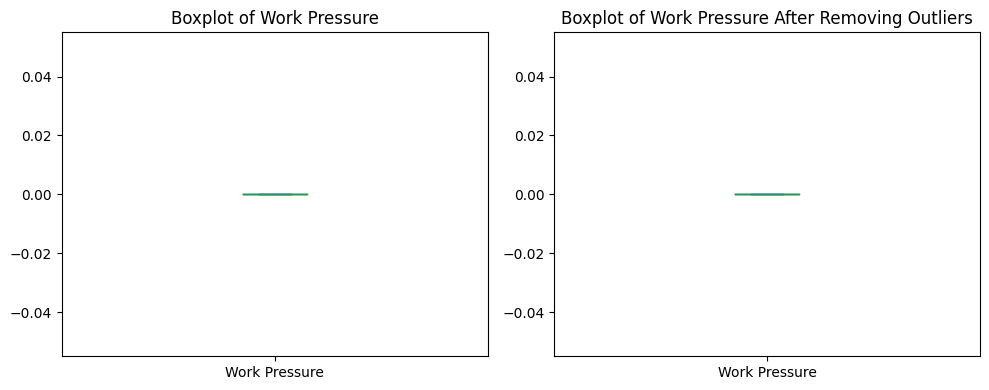

In [7]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Visualize outliers
        plt.figure(figsize=(10, 4))
        plt.subplot(121)
        df[col].plot(kind='box', title=f'Boxplot of {col}')
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        plt.subplot(122)
        df[col].plot(kind='box', title=f'Boxplot of {col} After Removing Outliers')
        plt.tight_layout()
        plt.show()
    
    return df

# Apply outlier removal to numeric columns
numeric_cols_for_outliers = ['Age', 'CGPA', 'Academic Pressure', 'Work Pressure']
df = remove_outliers(df, numeric_cols_for_outliers)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
categorical_columns = [
    'Gender', 'City', 'Profession', 'Sleep Duration', 
    'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]

numerical_columns = [
    'Age', 'Academic Pressure', 'Work Pressure', 
    'CGPA', 'Study Satisfaction', 'Job Satisfaction', 
    'Work/Study Hours', 'Financial Stress'
]

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
    ])

In [14]:
X = df.drop('Depression', axis=1)
y = df['Depression']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [19]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.84487087517934

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2332
           1       0.85      0.89      0.87      3244

    accuracy                           0.84      5576
   macro avg       0.84      0.84      0.84      5576
weighted avg       0.84      0.84      0.84      5576



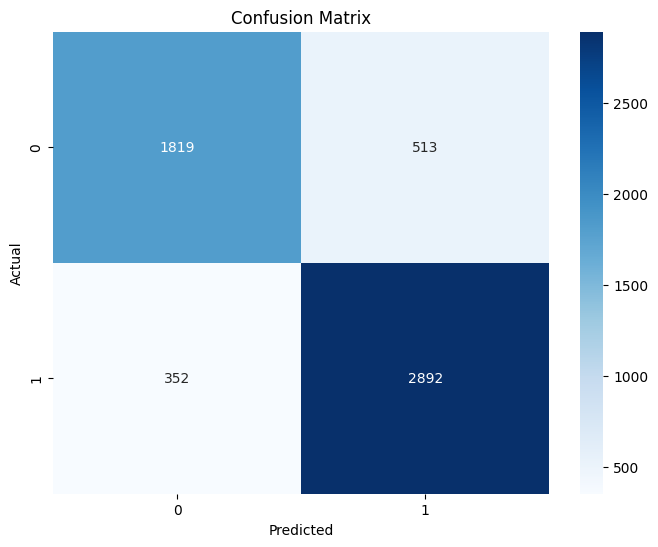

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

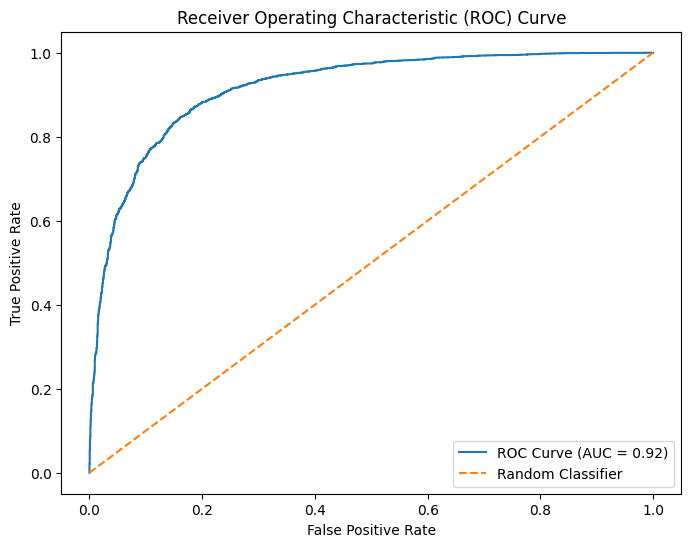

In [21]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# K-Means Clustering

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = [
    'Gender', 'City', 'Profession', 'Sleep Duration', 
    'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]
numerical_columns = [
    'Age', 'Academic Pressure', 'Work Pressure', 
    'CGPA', 'Study Satisfaction', 'Job Satisfaction', 
    'Work/Study Hours', 'Financial Stress'
]

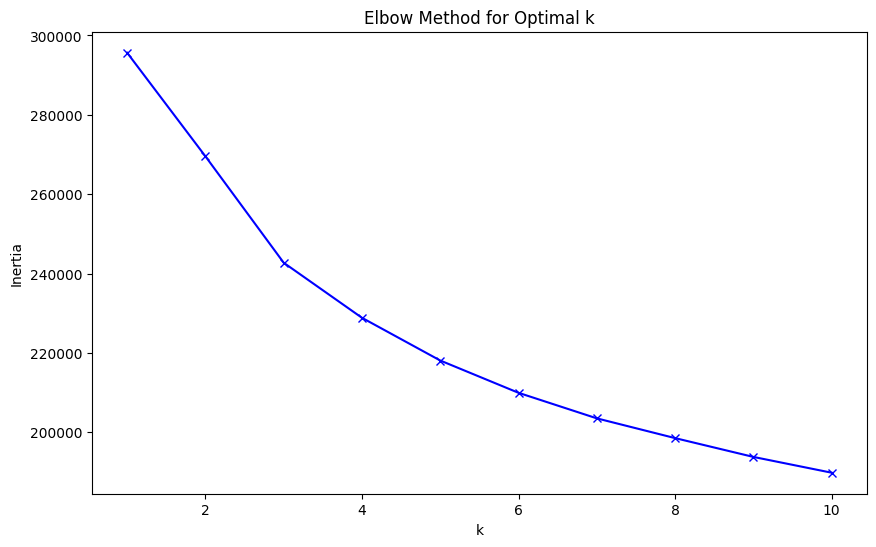

In [23]:
from sklearn.preprocessing import StandardScaler

# Modified preprocessor to return dense array
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_columns)
    ])

# Prepare data for clustering
X = df[numerical_columns + categorical_columns]

# Apply preprocessing
X_transformed = preprocessor.fit_transform(X)

# Find optimal number of clusters using elbow method
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_transformed)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

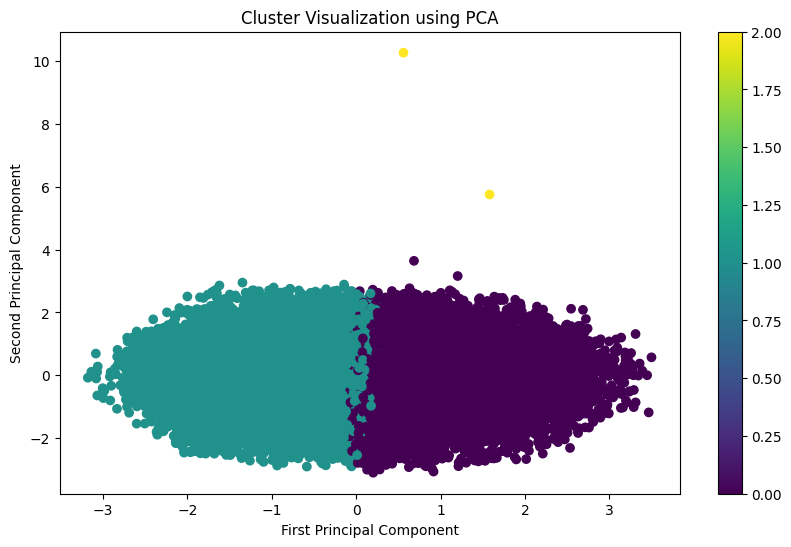


Cluster Sizes:
Cluster
1    14887
0    12991
2        2
Name: count, dtype: int64

Cluster Characteristics:

Cluster 0:

Numerical Features (Mean):
Age                   27.480025
Academic Pressure      2.247787
Work Pressure          0.000000
CGPA                   7.632158
Study Satisfaction     3.352398
Job Satisfaction       0.000000
Work/Study Hours       5.987992
Financial Stress       2.354938
dtype: float64

Categorical Features (Mode):
Gender: Male
City: Kalyan
Profession: Student
Sleep Duration: Less than 5 hours
Dietary Habits: Moderate
Degree: Class 12
Have you ever had suicidal thoughts ?: No
Family History of Mental Illness: No

Cluster 1:

Numerical Features (Mean):
Age                   24.355545
Academic Pressure      3.922617
Work Pressure          0.000000
CGPA                   7.681471
Study Satisfaction     2.588366
Job Satisfaction       0.000000
Work/Study Hours       8.178612
Financial Stress       3.824075
dtype: float64

Categorical Features (Mode):
Gender: 

In [24]:
# Apply K-means with chosen number of clusters (e.g., 3)
optimal_k = 3  # You can change this based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_transformed)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# Analyze cluster sizes
print("\nCluster Sizes:")
print(df['Cluster'].value_counts())

# Analyze cluster characteristics
print("\nCluster Characteristics:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    
    # Numerical features summary
    print("\nNumerical Features (Mean):")
    print(cluster_data[numerical_columns].mean())
    
    # Categorical features summary
    print("\nCategorical Features (Mode):")
    for col in categorical_columns:
        print(f"{col}: {cluster_data[col].mode().iloc[0]}")

### Streamlit (Final Form)

2024-12-24 08:15:12.252 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 08:15:12.532 
  command:

    streamlit run /shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-24 08:15:12.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 08:15:12.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 08:15:12.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site

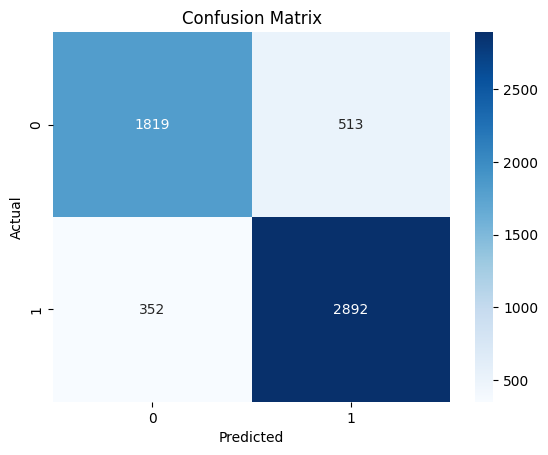

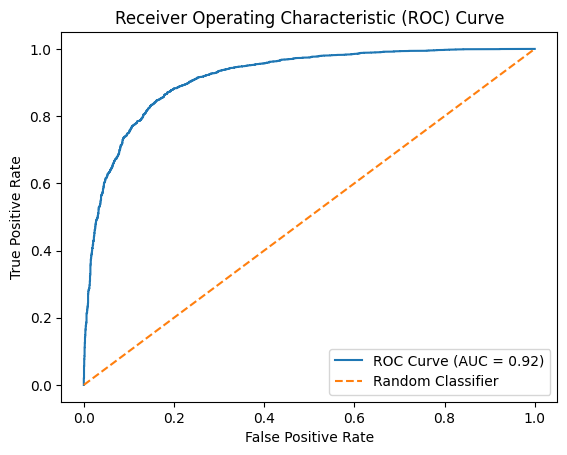

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from typing import Tuple, List

# Constants
MODEL_FILE = "student_depression_model.pkl"
NUMERIC_COLUMNS = [
    'Age', 'Academic Pressure', 'Work Pressure', 
    'CGPA', 'Study Satisfaction', 'Job Satisfaction', 
    'Work/Study Hours', 'Financial Stress'
]
CATEGORICAL_COLUMNS = [
    'Gender', 'City', 'Profession', 'Sleep Duration', 
    'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]

class DataProcessor:
    @staticmethod
    def load_data(file_path: str = 'Student Depression Dataset.csv') -> pd.DataFrame:
        try:
            return pd.read_csv(file_path)
        except FileNotFoundError:
            st.error(f"Dataset not found at {file_path}")
            return None
        except Exception as e:
            st.error(f"Error loading data: {str(e)}")
            return None

    @staticmethod
    def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
        if df is None:
            return None

        df = df.copy()
        
        # Fill missing values
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
        
        categorical_cols = df.select_dtypes(include=['object']).columns
        df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
        
        # Remove outliers using IQR method
        for col in ['Age', 'CGPA', 'Academic Pressure', 'Work Pressure']:
            if col in df.columns:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
        
        return df

class ModelBuilder:
    def __init__(self):
        self.preprocessor = self._create_preprocessor()
        self.model = self._create_pipeline()

    def _create_preprocessor(self) -> ColumnTransformer:
        return ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), NUMERIC_COLUMNS),
                ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), CATEGORICAL_COLUMNS)
            ])

    def _create_pipeline(self) -> Pipeline:
        return Pipeline([
            ('preprocessor', self.preprocessor),
            ('classifier', LogisticRegression(max_iter=1000))
        ])

    def save_model(self) -> None:
        with open(MODEL_FILE, 'wb') as f:
            pickle.dump(self.model, f)

    @staticmethod
    def load_model() -> Pipeline:
        try:
            with open(MODEL_FILE, 'rb') as f:
                return pickle.load(f)
        except FileNotFoundError:
            return None

class Visualizer:
    @staticmethod
    def plot_confusion_matrix(y_test: np.ndarray, y_pred: np.ndarray) -> None:
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title('Confusion Matrix')
        ax.set_ylabel('Actual')
        ax.set_xlabel('Predicted')
        st.pyplot(fig)

    @staticmethod
    def plot_roc_curve(y_test: np.ndarray, y_prob: np.ndarray) -> None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
        ax.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend()
        st.pyplot(fig)

    @staticmethod
    def plot_clusters(X_transformed: np.ndarray, clusters: np.ndarray) -> None:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_transformed)
        
        fig, ax = plt.subplots(figsize=(10, 6))
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
        ax.set_title('Cluster Visualization (PCA)')
        ax.set_xlabel('First Principal Component')
        ax.set_ylabel('Second Principal Component')
        plt.colorbar(scatter)
        st.pyplot(fig)

def main():
    st.title("Student Depression Analysis")
    
    # Initialize classes
    processor = DataProcessor()
    visualizer = Visualizer()
    
    # Load and preprocess data
    df = processor.load_data()
    if df is None:
        return
    
    df = processor.preprocess_data(df)
    if df is None:
        return

    # Prepare data for modeling
    X = df.drop('Depression', axis=1)
    y = df['Depression']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training/loading
    builder = ModelBuilder()
    if not os.path.exists(MODEL_FILE):
        st.info("Training new model...")
        builder.model.fit(X_train, y_train)
        builder.save_model()
        st.success("Model trained successfully!")
    else:
        builder.model = builder.load_model()
        if builder.model is None:
            st.error("Failed to load model")
            return

    # Model evaluation
    y_pred = builder.model.predict(X_test)
    y_prob = builder.model.predict_proba(X_test)[:, 1]

    # Display metrics
    st.write(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    st.write("Classification Report:")
    st.text(classification_report(y_test, y_pred))

    # Visualizations
    with st.expander("Model Performance Visualizations"):
        visualizer.plot_confusion_matrix(y_test, y_pred)
        visualizer.plot_roc_curve(y_test, y_prob)

    # Clustering analysis with fixed number of clusters
    with st.expander("Clustering Analysis"):
        X_transformed = builder.preprocessor.fit_transform(X)
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(X_transformed)
        
        visualizer.plot_clusters(X_transformed, clusters)
        
        # Cluster analysis
        df['Cluster'] = clusters
        st.write("#### Cluster Statistics")
        for cluster in range(3):
            cluster_data = df[df['Cluster'] == cluster]
            st.write(f"\nCluster {cluster} Size: {len(cluster_data)}")
            st.write("Average values:")
            st.write(cluster_data[NUMERIC_COLUMNS].mean())

if __name__ == "__main__":
    main()

In [ ]:
from pyngrok import ngrok
import threading
import os

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr="8501")
print(f"Streamlit app is live at: {public_url}")

ModuleNotFoundError: No module named 'pyngrok'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0feb3417-8c36-4f9d-b655-d962819f3dc0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>